<a href="https://colab.research.google.com/github/HuyenNguyenHelen/INFO-5505---Machine-learning/blob/main/HuyenNguyen_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: K-means clustering
Dataset: [Amyotrophic Lateral Sclerosis (ALS)](https://)


In [71]:
# Import primary libraries
import pandas as pd
import matplotlib.pyplot as plt


## Loading the dataset and exploratory analysis

In [72]:
# Load the dataset
data = pd.read_csv('/content/ALS_TrainingData_2223.csv')
data.head() 

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,24.0,22.0,18.0,0.020906,31,27.5,23.0,0.027875,30.0,28.0,25.0,0.017422,8.0322,7.11945,6.5718,0.005089,90,83.0,69,0.055556,160,139.0,129,0.082011,2.49500,2.220550,2.22055,0.000956,109.0,...,146.0,143.0,0.045296,8,6.5,4,0.010582,5,3.5,0,0.013228,-1023,1,172,169.0,152.0,4.5,4.25,4.0,0.001742,79,68.0,61,0.047619,4,3.0,3,0.002646,148.0,145.5,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,25.0,13.0,8.0,0.029617,31,17.0,14.0,0.029617,32.0,28.0,25.0,0.012195,8.3973,4.74630,4.0161,0.007633,80,78.0,64,0.028725,140,132.5,104,0.064632,2.32035,2.170650,2.02095,0.000522,108.0,...,132.0,128.0,0.017422,8,7.5,3,0.008977,9,8.0,4,0.008977,-341,1,286,264.0,230.0,5.0,4.30,3.9,0.001916,90,76.0,64,0.046679,4,4.0,3,0.001795,142.0,138.0,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,25.0,20.0,14.0,0.019643,24,19.0,18.0,0.010714,35.0,29.0,24.0,0.019643,5.4765,4.38120,3.6510,0.003260,86,76.0,58,0.050000,120,110.0,90,0.053571,2.47005,2.295400,2.19560,0.000490,108.0,...,154.0,151.0,0.017857,4,3.0,2,0.003571,10,7.0,4,0.010714,-1181,1,233,213.0,167.0,4.1,4.00,3.9,0.000357,82,73.0,60,0.039286,4,4.0,4,0.000000,145.0,143.0,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,62.0,60.0,41.0,0.052369,46,40.0,33.0,0.032419,23.0,20.0,20.0,0.007481,8.0322,8.03220,6.5718,0.003642,90,80.0,70,0.049875,150,130.0,120,0.074813,2.47005,2.345300,2.23000,0.000474,109.0,...,145.0,144.0,0.024938,4,3.5,2,0.004988,12,12.0,12,0.000000,-365,2,275,233.0,204.0,4.3,4.20,4.0,0.000748,84,72.0,68,0.039900,3,3.0,3,0.000000,143.0,139.0,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,38.0,26.5,22.0,0.026534,35,26.5,20.0,0.024876,32.0,28.0,23.0,0.014925,5.1114,4.19865,3.6510,0.002422,100,80.0,68,0.053068,160,130.0,104,0.092869,2.42015,2.257975,2.17065,0.000414,107.0,...,146.5,138.0,0.023217,2,2.0,0,0.003396,12,12.0,12,0.000000,-1768,2,313,283.5,268.0,4.6,3.75,3.5,0.001824,101,96.0,74,0.044776,4,4.0,3,0.001698,143.0,140.0,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [73]:
# Print feature names
print([name for name in data.columns])

['ID', 'Age_mean', 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range', 'ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min', 'ALSFRS_Total_range', 'ALT.SGPT._max', 'ALT.SGPT._median', 'ALT.SGPT._min', 'ALT.SGPT._range', 'AST.SGOT._max', 'AST.SGOT._median', 'AST.SGOT._min', 'AST.SGOT._range', 'Bicarbonate_max', 'Bicarbonate_median', 'Bicarbonate_min', 'Bicarbonate_range', 'Blood.Urea.Nitrogen..BUN._max', 'Blood.Urea.Nitrogen..BUN._median', 'Blood.Urea.Nitrogen..BUN._min', 'Blood.Urea.Nitrogen..BUN._range', 'bp_diastolic_max', 'bp_diastolic_median', 'bp_diastolic_min', 'bp_diastolic_range', 'bp_systolic_max', 'bp_systolic_median', 'bp_systolic_min', 'bp_systolic_range', 'Calcium_max', 'Calcium_median', 'Calcium_min', 'Calcium_range', 'Chloride_max', 'Chloride_median', 'Chloride_min', 'Chloride_range', 'Creatinine_max', 'Creatinine_median', 'Creatinine_min', 'Creatinine_range', 'Gender_mean', 'Glucose_max', 'Glucose_median', 'Glucose_min', 'Glucose_ra

In [74]:
# Explore the dataset
data.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,ALT.SGPT._max,ALT.SGPT._median,ALT.SGPT._min,ALT.SGPT._range,AST.SGOT._max,AST.SGOT._median,AST.SGOT._min,AST.SGOT._range,Bicarbonate_max,Bicarbonate_median,Bicarbonate_min,Bicarbonate_range,Blood.Urea.Nitrogen..BUN._max,Blood.Urea.Nitrogen..BUN._median,Blood.Urea.Nitrogen..BUN._min,Blood.Urea.Nitrogen..BUN._range,bp_diastolic_max,bp_diastolic_median,bp_diastolic_min,bp_diastolic_range,bp_systolic_max,bp_systolic_median,bp_systolic_min,bp_systolic_range,Calcium_max,Calcium_median,Calcium_min,Calcium_range,Chloride_max,...,Hemoglobin_median,Hemoglobin_min,Hemoglobin_range,leg_max,leg_median,leg_min,leg_range,mouth_max,mouth_median,mouth_min,mouth_range,onset_delta_mean,onset_site_mean,Platelets_max,Platelets_median,Platelets_min,Potassium_max,Potassium_median,Potassium_min,Potassium_range,pulse_max,pulse_median,pulse_min,pulse_range,respiratory_max,respiratory_median,respiratory_min,respiratory_range,Sodium_max,Sodium_median,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,54.436257,32.993252,23.014800,0.071137,43.127755,29.076923,21.542465,0.049191,30.897301,26.963765,23.164327,0.016868,7.353054,5.558011,4.160875,0.007133,92.030589,81.113360,69.890688,0.047658,147.135403,129.579172,113.429600,0.071178,2.474835,2.345584,2.222855,0.000541,107.152182,...,144.289024,135.461130,0.038242,5.309942,4.049708,2.493477,0.006163,10.743140,9.703329,7.778228,0.006595,-682.995502,1.800720,285.301844,238.781601,208.382005,4.628367,4.189269,3.857323,0.001744,90.642375,76.973234,65.373819,0.053587,3.910031,3.592668,2.791273,0.002513,143.428880,140.145254,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,44.829577,15.601925,11.231221,0.110889,35.288701,9.593911,7.395303,0.084100,3.164472,2.198824,2.408519,0.011280,2.319538,1.335236,1.354256,0.005070,8.758227,7.245578,8.443662,0.027282,15.754048,12.160938,11.195037,0.033110,0.180246,0.088418,0.172787,0.000481,2.616967,...,11.602846,14.890612,0.035134,2.244651,2.280781,2.124570,0.004372,1.897501,2.771850,3.740073,0.006128,411.800405,0.419334,70.175312,52.626504,49.321238,1.325412,0.243075,0.263050,0.002898,11.104866,8.437749,7.763446,0.027403,0.298516,0.612385,1.055428,0.002477,2.333157,1.789886,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,10.000000,8.000000,1.600000,0.002747,11.000000,9.000000,1.000000,0.000000,20.000000,19.500000,2.500000,0.000000,2.920800,2.190600,0.584160,0.000000,70.000000,56.000000,20.

### Selecting variables for inputting into the k-means clustering model
The dataset has 101 columns. Inputting all of them into the model would make it very complicated, and cluster interpretation would be problematic. 

Looking at the dataset, we will drop insignificant variables such as ID. Using Principle Component Analysis (PCA) would be a good method to reduce dimensions of this dataset, but here we still can manually select variables. We can see that a common thing is that several columns describe for a main features affected the disease such as 'Albumin_max', 'Albumin_median', 'Albumin_min', 'Albumin_range' for Albumin, ALSFRS_slope', 'ALSFRS_Total_max', 'ALSFRS_Total_median', 'ALSFRS_Total_min'for ALSFRS, etc. An reasonable way to reduce dimensions of the dataset is select the columns discribing median.

Here, we can manually select following variables for inputting into the model:

X=['Age_mean', 'Albumin_median', 'ALSFRS_slope', 'ALSFRS_Total_median', 'ALT.SGPT._median', 'AST.SGOT._median', 'Bicarbonate_median', 'Blood.Urea.Nitrogen..BUN._median', 'bp_diastolic_median', 'bp_systolic_median', 'Calcium_median',  'Chloride_median',  'Creatinine_median',  'Gender_mean', 'Glucose_median', 'hands_median',  'Hematocrit_median', 'Hemoglobin_median', 'leg_median', 'mouth_median', 'onset_delta_mean', 'onset_site_mean', 'Platelets_median','Potassium_median', 'pulse_median',  'respiratory_median',  'Sodium_median',  'SubjectID',  'trunk_median', 'Urine.Ph_median']


In [75]:
selected_variables = ['Age_mean', 'Albumin_median', 'ALSFRS_slope', 'ALSFRS_Total_median', 'ALT.SGPT._median', 'AST.SGOT._median', 'Bicarbonate_median', 'Blood.Urea.Nitrogen..BUN._median', 'bp_diastolic_median', 'bp_systolic_median', 'Calcium_median', 'Chloride_median', 'Creatinine_median', 'Gender_mean', 'Glucose_median', 'hands_median', 'Hematocrit_median', 'Hemoglobin_median', 'leg_median', 'mouth_median', 'onset_delta_mean', 'onset_site_mean', 'Platelets_median','Potassium_median', 'pulse_median', 'respiratory_median', 'Sodium_median', 'SubjectID', 'trunk_median', 'Urine.Ph_median']

### Data Standardization
Looking at min, max, and standard deriviation, we see that data have different value scales/ranges. K-means clustering algorithm implements Eclidean distance to calculate distance among data points that greater values have stronger influence. For example, the weight is normally more influencial. Therefore, standardization, known as feature scaling, is an important step in k-means clustering. We will be rescaling our dataset below: 

In [76]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data= scaler.fit_transform(data[selected_variables])
scaled_data[:2]

array([[ 0.91713698, -1.30078105, -0.38145034,  0.13495988, -0.70476724,
        -0.16440405,  0.4713737 ,  1.16967352,  0.26044358,  0.77485365,
        -1.41443932,  1.93837712,  0.82771785, -1.32592025, -0.79742556,
         1.05490429,  0.30390945,  0.14749494,  1.07456347, -2.23847738,
        -0.8258394 , -1.90993281, -1.32627662,  0.24990065, -1.06370228,
        -0.96801923,  2.99234197, -1.71927894,  0.98183247,  0.46305355],
       [-0.57487867, -1.11240084, -0.31090704,  0.88886316, -1.28174892,
        -1.25909443,  0.4713737 , -0.60805223, -0.4297878 ,  0.24023516,
        -1.97893172, -0.63120168, -0.70024472, -1.32592025, -0.39574277,
         0.44503418,  0.01095717, -1.05937705,  1.51310846, -0.61464791,
         0.83067536, -1.90993281,  0.4793036 ,  0.45564456, -0.11536884,
         0.66530658, -1.19881209, -1.71887875,  0.98183247, -1.13720768]])

In [77]:
# Explore some basic statistics of the scaled data
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03,2.223000e+03
mean,-1.760975e-16,-5.649502e-16,-3.236278e-17,-9.159465e-17,1.717774e-16,1.598786e-17,-5.948720e-16,4.426409e-16,3.952079e-16,-9.572271e-16,-1.572292e-15,1.434850e-15,-3.856564e-16,1.970733e-16,1.699639e-16,1.670579e-16,-3.632322e-16,-5.823302e-17,1.420366e-16,-3.025520e-16,-1.009838e-16,-1.948759e-16,1.485292e-16,2.094691e-15,-6.867601e-16,-6.910052e-16,-1.017575e-14,2.717874e-16,2.389252e-16,9.369224e-17
std,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00,1.000225e+00
min,-3.207847e+00,-3.561344e+00,-5.813285e+00,-3.709947e+00,-1.602294e+00,-2.093144e+00,-3.395198e+00,-2.522526e+00,-3.466806e+00,-3.255347e+00,-3.390163e+00,-5.770359e+00,-2.719091e+00,-1.325920e+00,-1.600791e+00,-1.994446e+00,-3.227032e+00,-3.300711e+00,-1.775979e+00,-3.501456e+00,-5.916829e+00,-1.909933e+00,-3.150863e+00,-4.893697e+00,-3.197453e+00,-5.867997e+00,-6.787018e+00,-1.719279e+00,-2.280669e+00,-1.137208e+00
25%,-6.626443e-01,-7.356404e-01,-5.754444e-01,-6.189434e-01,-7.047672e-01,-7.378133e-01,-4.384079e-01,-6.876815e-01,-4.297878e-01,-7.878773e-01,-7.088238e-01,-6.312017e-01,-7.002447e-01,-1.325920e+00,-4.633935e-01,-7.747061e-01,4.396588e-02,-7.145565e-01,-6.796165e-01,-6.146479e-01,-4.955080e-01,4.753372e-01,-6.610629e-01,-7.788189e-01,-5.895356e-01,-9.680192e-01,-6.399916e-01,-8.902791e-01,-8.824542e-01,-1.137208e+00
50%,3.948071e-02,1.788044e-02,1.728185e-01,1.349599e-01,-1.918946e-01,-2.165322e-01,1.648289e-02,-1.015111e-01,-1.536952e-01,3.461266e-02,-3.208330e-03,2.253246e-01,-1.840100e-01,7.541932e-01,-1.504710e-01,2.417441e-01,2.585225e-01,6.128980e-02,-4.603440e-01,4.679051e-01,2.695978e-01,4.753372e-01,-1.098857e-01,4.415673e-02,3.172843e-03,6.653066e-01,-8.117101e-02,-7.056172e-03,4.968915e-02,4.630535e-01
75%,7.416057e-01,7.714013e-01,7.143197e-01,7.380825e-01,4.491961e-01,5.132614e-01,4.713737e-01,5.951516e-01,5.365361e-01,5.281067e-01,6.155839e-01,6.535877e-01,7.868109e-01,7.541932e-01,1.671761e-01,8.516143e-01,4.565747e-01,6.647258e-01,8.552910e-01,8.287561e-01,7.505214e-01,4.753372e-01,5.933402e-01,4.556446e-01,4.773396e-01,6.653066e-01,4.776495e-01,8.673900e-01,7.487966e-01,4.630535e-01
max,2.321387e+00,2.692879e+00,3.110443e+00,1.944328e+00,1.025788e+01,7.394172e+00,5.702618e+00,4.725125e+00,3.987693e+00,4.969553e+00,5.140573e+00,3.223167e+00,6.430247e+00,7.541932e-01,1.665346e+01,1.258194e+00,1.364314e+00,3.250880e+00,1.732381e+00,8.287561e-01,1.620070e+00,2.860607e+00,5.458904e+00,3.747547e+00,4.507757e+00,6.653066e-01,3.551163e+00,1.727057e+00,1.447904e+00,5.263837e+00


It seems all variable values have the same magnitude now with a mean = 0

## Developping the K-mean clustering models
With k-means clustering algorithm, selecting a proper numer of clusters k is problematic. The selected k should be able to minimize the variability, ditances among elements within clusters (SSE), but maximize the dissimility, distances among clusters. 

Two common methods to select a proper k are the elbow method, and the silhouette coefficient. Since none of them are better, but they should be used together to strengthen our decision. So here, we are going to find an appropriate k with both methods.

### Selecting k by applying the elbow method

In [78]:
# Import k-mean clustering package from sklearn
from sklearn.cluster import KMeans

# Setting parameters for the k-means model by a dictionary unpacking operator 
kmeans_para= {'init':'k-means++', # set ranromly initial seed
              'n_init': 10,
              'max_iter':  300, # the number of maximum iterations for each initialization
              'random_state': 42 # make sure we got the same set of pseudo random number each time we run.
              } 

In [79]:
# Build and run a series of k-mean models over a range of k

sse=[]
for k in range (1,11):
  # build k-means models
  kmeans = KMeans (n_clusters = k, **kmeans_para)
  # fit the model into the data
  kmeans.fit(scaled_data)
  # append the lowest sse value for each k assignment
  sse.append (kmeans.inertia_)

In [80]:
print (sse)

[66690.0, 61155.52399425465, 57768.300665594295, 55376.612066453665, 53723.03330775782, 52113.693416038484, 50954.40135862789, 50052.31564203792, 49225.0598133431, 48374.78160539059]


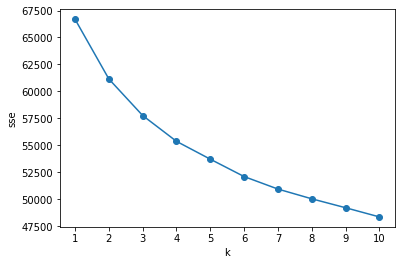

In [81]:
# Visualize the elbow of sse
x=[i for i in range (1,11)]
y=sse
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('sse')
plt.show()

Looking at the elbow plot, we can select a k=3, k=4, or k=5.

Let see their Silhouette coefficients

### Silhouette coefficient 
This method measures the cohesion within clusters and disimilarity between cluster. This score ranges from -1 to 1. The greater the score is, the better the model performs. 

In [82]:
# Build and run a series of k-mean models over a range of k to get the Silhoutte coefficient

# import the library
from sklearn.metrics import silhouette_score

sil_cof=[]
for k in range (2,11):
  # build k-means models
  kmeans = KMeans (n_clusters = k, **kmeans_para)
  # fit the model into the data
  kmeans.fit(scaled_data)
  # get Silhouette coefficient score
  sil_cof_score = silhouette_score(scaled_data,kmeans.labels_ )
  # append the silhouette score for each k assignment
  sil_cof.append (sil_cof_score)

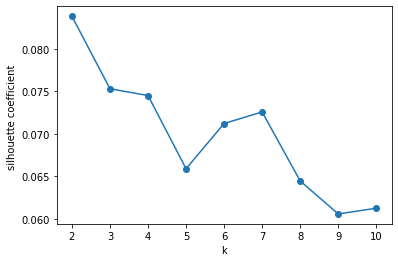

In [83]:
# Visualize the silhoutte efficient for each k
x=[i for i in range (2,11)]
y=sil_cof
plt.plot(x, y, marker='o')
plt.xticks(x)
plt.xlabel('k')
plt.ylabel('silhouette coefficient ')
plt.show()

The highest silhouette scores are for k=2, k=3, and k=4. However, two clusers are often too few because its clusters would be too general. It seems k=3 is the optimum for the two validation methods.

## K-means Cluster Model with k=3

In [84]:

kmeans_k3 = KMeans (n_clusters = 3, **kmeans_para)
# fit the model into the scaled selected feature values
kmeans_k3.fit(scaled_data)
# print the SSE of the model
print ('SSE:', kmeans_k3.inertia_)

# apply the model to cluster the dataset
pred = kmeans_k3.predict(scaled_data)

SSE: 57768.300665594295


In [85]:
# Observe the data sizes of formed clusters
scaled_data_df = pd.DataFrame(scaled_data)
scaled_data_df['cluster'] = pred
scaled_data_df['cluster'].value_counts()

2    896
1    680
0    647
Name: cluster, dtype: int64

We can see data sizes of three clusters are quite balanced. This is what we aimed to achieve.

## Cluster Interpretation
Interpretability is especially important for k-means clustering, and unsupervised machine learning in general.

It's better to use original data for interpreting rather than standardized data.

In [86]:
# Select several significant variables for plotting with centriod of clusters
plt.scatter(["x1"], scaled_data_df["cluster"])
plt.scatter(data["x2"], data["y"])
plt.show()